<a href="https://colab.research.google.com/github/soulaimane2/GoogleStockPrediction/blob/main/Google_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GoogleStockPrediction/GOOG.csv",date_parser=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4134,2021-01-21,1898.000000,1934.859985,1887.109985,1891.250000,1891.250000,2063900
4135,2021-01-22,1895.680054,1910.949951,1881.760010,1901.050049,1901.050049,1272100
4136,2021-01-25,1920.670044,1929.579956,1867.530029,1899.400024,1899.400024,1927300
4137,2021-01-26,1888.839966,1925.000000,1884.244995,1917.239990,1917.239990,1313100
4138,2021-01-27,1882.530029,1890.000000,1809.000000,1830.790039,1830.790039,2748300


In [6]:
training_data = data[data['Date'] < '2016-11-11'].copy()
test_data = data[data['Date'] >= '2016-11-11'].copy()

In [7]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3076,2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800
3077,2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
3078,2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1366900
3079,2016-11-09,779.940002,791.226990,771.669983,785.309998,785.309998,2607100
3080,2016-11-10,791.169983,791.169983,752.179993,762.559998,762.559998,4745200


In [8]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3081,2016-11-11,756.539978,760.780029,750.380005,754.020020,754.020020,2431800
3082,2016-11-14,755.599976,757.849976,727.539978,736.080017,736.080017,3654400
3083,2016-11-15,746.969971,764.416016,746.969971,758.489990,758.489990,2384000
3084,2016-11-16,755.200012,766.359985,750.510010,764.479980,764.479980,1472600
3085,2016-11-17,766.919983,772.700012,764.229980,771.229980,771.229980,1304000


In [9]:
training_data = training_data.drop(['Date','Adj Close'],axis=1)

In [10]:
training_data.tail()

,Open,High,Low,Close,Volume
3076,750.659973,770.359985,750.560974,762.020020,2134800
3077,774.500000,785.190002,772.549988,782.520020,1585100
3078,783.400024,795.632996,780.190002,790.510010,1366900
3079,779.940002,791.226990,771.669983,785.309998,2607100
3080,791.169983,791.169983,752.179993,762.559998,4745200


In [11]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[5.25876027e-04, 1.50870897e-03, 0.00000000e+00, 2.15365890e-04,
        5.43577158e-01],
       [1.18159289e-03, 4.77323266e-03, 2.98614418e-03, 5.41667348e-03,
        2.77885876e-01],
       [7.50506935e-03, 7.63456964e-03, 8.60982389e-03, 6.12802012e-03,
        2.22151352e-01],
       ...,
       [9.56625489e-01, 9.72523501e-01, 9.67055695e-01, 9.70391432e-01,
        1.64657328e-02],
       [9.52115967e-01, 9.66771535e-01, 9.55805757e-01, 9.63578817e-01,
        3.14923203e-02],
       [9.66752247e-01, 9.66697113e-01, 9.30070934e-01, 9.33773699e-01,
        5.73980990e-02]])

In [12]:
training_data.shape

(3081, 5)

In [14]:
training_data

array([[5.25876027e-04, 1.50870897e-03, 0.00000000e+00, 2.15365890e-04,
        5.43577158e-01],
       [1.18159289e-03, 4.77323266e-03, 2.98614418e-03, 5.41667348e-03,
        2.77885876e-01],
       [7.50506935e-03, 7.63456964e-03, 8.60982389e-03, 6.12802012e-03,
        2.22151352e-01],
       ...,
       [9.56625489e-01, 9.72523501e-01, 9.67055695e-01, 9.70391432e-01,
        1.64657328e-02],
       [9.52115967e-01, 9.66771535e-01, 9.55805757e-01, 9.63578817e-01,
        3.14923203e-02],
       [9.66752247e-01, 9.66697113e-01, 9.30070934e-01, 9.33773699e-01,
        5.73980990e-02]])

In [18]:
x_train = []
y_train = []

for i in range(60,training_data.shape[0]):
  x_train.append(training_data[i-60:i])
  y_train.append(training_data[i,0])
x_train,y_train = np.array(x_train) , np.array(y_train)

In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [21]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [23]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [24]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=60, batch_size=64)

Epoch 1/60
48/48 [==============================] - 14s 199ms/step - loss: 0.0776
Epoch 2/60
48/48 [==============================] - 10s 205ms/step - loss: 0.0043
Epoch 3/60
48/48 [==============================] - 10s 205ms/step - loss: 0.0029
Epoch 4/60
48/48 [==============================] - 10s 209ms/step - loss: 0.0032
Epoch 5/60
48/48 [==============================] - 10s 206ms/step - loss: 0.0029
Epoch 6/60
48/48 [==============================] - 10s 214ms/step - loss: 0.0025
Epoch 7/60
48/48 [==============================] - 10s 208ms/step - loss: 0.0022
Epoch 8/60
48/48 [==============================] - 10s 205ms/step - loss: 0.0026
Epoch 9/60
48/48 [==============================] - 10s 208ms/step - loss: 0.0023
Epoch 10/60
48/48 [==============================] - 10s 205ms/step - loss: 0.0026
Epoch 11/60
48/48 [==============================] - 10s 207ms/step - loss: 0.0022
Epoch 12/60
48/48 [==============================] - 10s 205ms/step - loss: 0.0021
Epoch 13/60
4

In [26]:
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3081,2016-11-11,756.539978,760.780029,750.380005,754.020020,754.020020,2431800
3082,2016-11-14,755.599976,757.849976,727.539978,736.080017,736.080017,3654400
3083,2016-11-15,746.969971,764.416016,746.969971,758.489990,758.489990,2384000
3084,2016-11-16,755.200012,766.359985,750.510010,764.479980,764.479980,1472600
3085,2016-11-17,766.919983,772.700012,764.229980,771.229980,771.229980,1304000


In [28]:
past_60_days = test_data.tail(60)
df = past_60_days.append(test_data, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1672.109985,1687.000000,1604.459961,1621.010010,4329100
1,1628.160034,1660.770020,1616.030029,1626.030029,2535400
2,1631.780029,1661.699951,1616.619995,1650.209961,1661700
3,1710.280029,1771.364990,1706.030029,1749.130005,3570900
4,1781.000000,1793.640015,1750.510010,1763.369995,2065800


In [29]:
inputs = scaler.transform(df)
inputs

array([[2.11490059, 2.13618807, 2.05543192, 2.05844202, 0.05235652],
       [2.05761966, 2.10194527, 2.07070918, 2.06501882, 0.03062358],
       [2.06233768, 2.10315928, 2.07148817, 2.09669731, 0.02003761],
       ...,
       [2.43885435, 2.4528721 , 2.40279288, 2.42316498, 0.02325569],
       [2.39736951, 2.44689304, 2.42486353, 2.44653739, 0.01581388],
       [2.38914563, 2.40120114, 2.32550911, 2.333278  , 0.03320314]])

In [30]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1058, 60, 5), (1058,))

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
scaler.scale_

array([1.30332184e-03, 1.30548311e-03, 1.32041233e-03, 1.31011509e-03,
       1.21162615e-08])

In [33]:
scale = 1/1.30332184e-03
scale

767.2701932164354

In [34]:
y_pred = y_pred*scale
y_test = y_test*scale

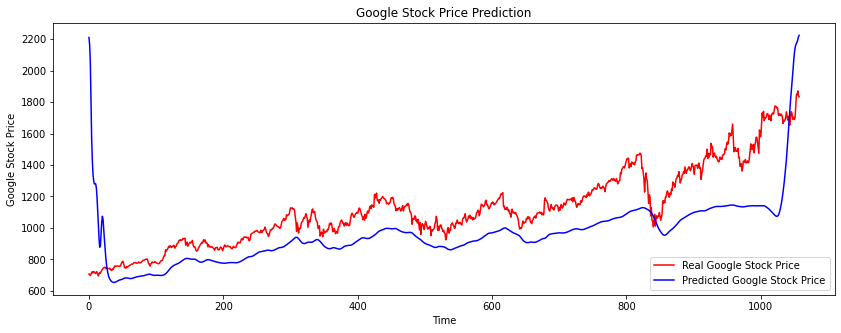

In [35]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## So as we see here the chart says that tomorrow the stock price is going to incline, the time now is 00:31 1/29/2021, we'll see as the stock market is open